# Importing Needed Libraries for Analysis

In [1]:
# Import Libraries needed for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast 

# Loading Dataset

In [2]:
bookings = pd.read_csv('hotels_cc.csv')

# 1. Understanding the Dataset



It is import to understand the nature of the data in our possession. Our primary objectives in this process is to identify the size of the dataset (rows and columns), the type of data (integers, floats, or string), number of duplicated entries and number missing values. These are useful in identifying what kinds of analysis are possible and informing decisions concerning data cleaning.

## Preview the Data

In [3]:
bookings.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Dataset size

In [4]:
print('Number of rows: ', bookings.shape[0])
print('Number of columns: ', bookings.shape[1])

Number of rows:  119390
Number of columns:  32


## Dataset Info

In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Duplicated Entries

Duplicate data records are a common problem in data analysis, especially when dealing with large or complex datasets from multiple sources. They can affect the quality, accuracy, and reliability of your analysis and lead to erroneous conclusions or decisions. They lead to issues such as reducing the validity and reliability of your data, introducing bias or inconsistency, wasting storage space and computing resources, complicating the data processing and analysis steps, and impairing the data visualization and communication. These issues can arise from inflating or deflating the frequency, distribution, or correlation of your variables, favoring or excluding certain data records or groups, increasing the size and complexity of your data, requiring additional checks and validations, and creating misleading or confusing charts and reports.

In [6]:
is_row_duplicated = bookings.duplicated()
duplicated_rows = bookings[is_row_duplicated]
print("Number of duplicates: ", len(duplicated_rows))

Number of duplicates:  31994


## Missing Values

In [7]:
bookings.isnull().sum().sort_values(ascending = False) 

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

<Axes: >

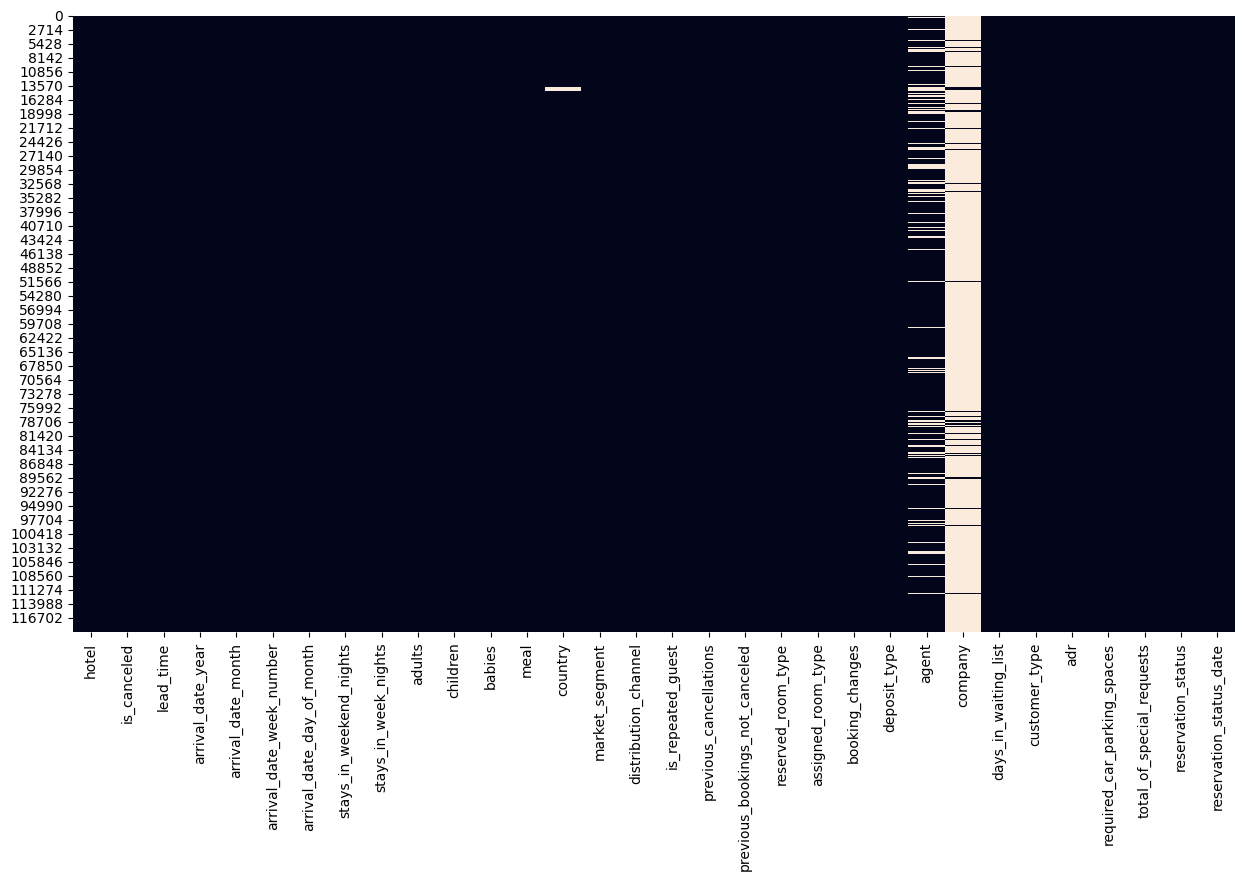

In [8]:
#Visualising missing values using seaborn heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bookings.isnull(), cbar=False)

<Axes: >

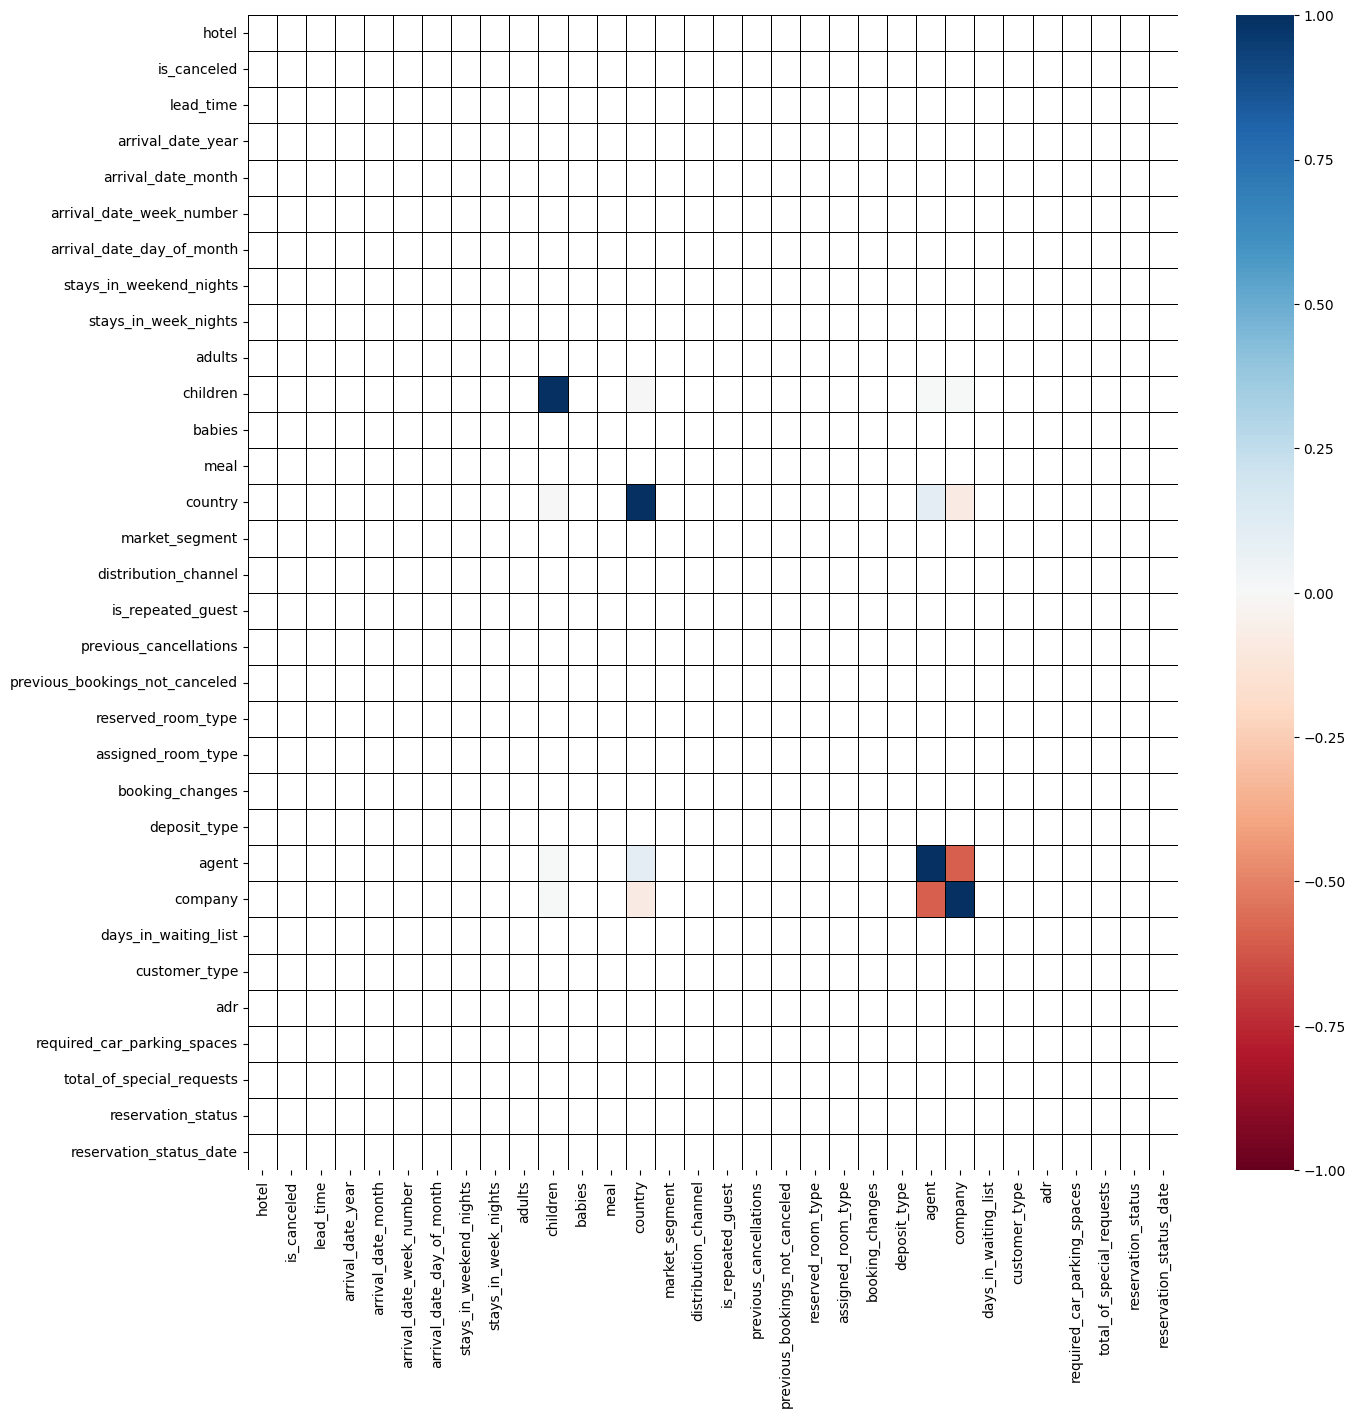

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(bookings.isnull().corr(), cbar=True, vmin=-1, cmap='RdBu',linewidths=0.5, linecolor='black')

## Summary


* The dataset contains 1119390 rows and 32 columns
* The data types present within our dataset are: object, float64, and int64
* There are 31994 duplicate entries
* Four columns have missing values. These include:
* * Company with 112593 missing values
  * Agent with 16340 missing values
  * Country with 488 missing values
  * Children with 4 missing values

# 2. Understanding the Variables

In [10]:
bookings.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
bookings.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# VARIABLES DESCRIPTION

In [12]:
for elem in bookings.columns:
  print('Number of unique values in',elem,'column is',bookings[elem].nunique())

Number of unique values in hotel column is 2
Number of unique values in is_canceled column is 2
Number of unique values in lead_time column is 479
Number of unique values in arrival_date_year column is 3
Number of unique values in arrival_date_month column is 12
Number of unique values in arrival_date_week_number column is 53
Number of unique values in arrival_date_day_of_month column is 31
Number of unique values in stays_in_weekend_nights column is 17
Number of unique values in stays_in_week_nights column is 35
Number of unique values in adults column is 14
Number of unique values in children column is 5
Number of unique values in babies column is 5
Number of unique values in meal column is 5
Number of unique values in country column is 177
Number of unique values in market_segment column is 8
Number of unique values in distribution_channel column is 5
Number of unique values in is_repeated_guest column is 2
Number of unique values in previous_cancellations column is 15
Number of uni

In [13]:
bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
bookings['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

# 3. DATA CLEANING

## Missing values

In [15]:
# Alternatively:
bookings[['company','agent','children']] = bookings[['company','agent','children']].fillna(0)
bookings[['country']] = bookings[['country']].fillna('others')

In [16]:
bookings.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

## DUPLICATED ROWS

In [17]:
bookings = bookings.drop_duplicates()

In [18]:
len(bookings[bookings.duplicated()])

0

In [19]:
bookings[bookings['adults']+bookings['children']+bookings['babies']==0].shape

(166, 32)

In [20]:
bookings.drop(bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].index, inplace = True)
with pd.option_context('mode.chained_assignment', None):
    bookings.drop(bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].index, inplace = True)

In [21]:
# agentb = bookings.nlargest(30, 'agent')
# agentb[["company", "agent"]]
# agentb = bookings.agent.value_counts()
# agent = agentb.nlargest(30)
help(sns.barplot(x = agents.index, y=agents.values,hue=  palette = "GnBu"))

SyntaxError: invalid syntax (2416486927.py, line 5)

In [ ]:
# agent.plot(x='agent', y ='mean', kind='bar', title = "Agent with more bookings", xlabel = "Agent ID's ", ylabel = "Number of bookings")

agents = bookings.agent.value_counts().nlargest(10)
plt.figure(figsize = (6,6))
sns.barplot(x = agents.index, y=agents.values,hue=  palette = "GnBu")


In [ ]:
meal =bookings.meal.value_counts()
meal.plot(x='meal', y ='mean', kind='bar', title = "Most preferred meal", xlabel = "meals ", ylabel = "mean", color = ["g", "r","purple", "blue","red"])


In [ ]:
#group the data according to the hotel type
hotel_type = bookings.groupby('hotel')

#Group the Hotels by their adr
mean_adr= hotel_type['adr'].mean().reset_index()

#Create the plot
ax = sns.barplot(x= mean_adr['hotel'], y= mean_adr['adr'])

#labelling the various axes

ax.set_xlabel("Hotel type", fontsize = 25)
ax.set_ylabel("ADR", fontsize = 25)
ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize = 16)
ax.set_title('Average ADR Per Hotel type', fontsize = 20)
plt.show(ax)